## 1. Описание и начальная работа с данными

Вам необходимо подготовить данные и описать их. Данные реальные и содержат пропущенные значения, а также лишние относительно друг друга данные.

Объедините датасеты (кроме `students.scv`) в один общий для дальнейшей работы. Отдельный датасет создайте для расчета среднего возраста студентов курсов (отдельный датасет со `students.scv` нужен, чтобы в основном не потерять значения в основном датасете из-за того, что не по всем студентам есть анкетные данные о дате рождения). <br> <br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import datetime as dt

courses = pd.read_csv('./Data/courses.csv')
course_contents = pd.read_csv('./Data/course_contents.csv')
progresses = pd.read_csv('./Data/progresses.csv')
progress_phases =pd.read_csv('./Data/progress_phases.csv')
students = pd.read_csv('./Data/students.csv')

del courses['Unnamed: 0']
courses.columns = ['course_id', 'course_title', 'course_field']
progresses.rename(columns={'id': 'progress_id'}, inplace=True)

one = pd.merge(progress_phases, progresses, on='progress_id')
two = pd.merge(courses, course_contents, on='course_id')
main = pd.merge(one, two, how='left', on=['module_number', 'lesson_number', 'course_id'])

In [2]:
main.head()

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,course_title,course_field,module_title,lesson_title,lesson_token,is_video,is_homework
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
1,a387ab916f402cb3fbfffd29f68fd0ce,1,1,done,2018-06-20 14:25:21.783762+00,2018-06-20 15:45:07.717209+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Интро курса,df1a1f20-cdf7-443d-b25b-0a4b990b84d9,True,False
2,a387ab916f402cb3fbfffd29f68fd0ce,2,2,done,2018-06-23 08:18:09.653771+00,2018-06-23 08:18:12.784616+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Что такое концептуальный дизайн,f23b1890-9365-406f-816b-04864cefe58f,True,False
3,a387ab916f402cb3fbfffd29f68fd0ce,1,4,done,2018-06-20 16:00:06.36178+00,2018-06-21 19:09:30.845034+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Личное позиционирование,9dd50916-4aa6-4a73-b86c-56a1bd7753c8,True,False
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True


1. **(p)** Посчитайте

* общее количество курсов в датасете

In [3]:
main['course_id'].unique().size

15

* количество модулей на каждом курсе

In [4]:
main.groupby('course_title')['module_number'].nunique()

course_title
Excel Базовый                           9
Java-разработчик                       17
Java-разработчик c нуля                 9
JavaScript с нуля                      18
PHP-разработчик с 0 до PRO. Часть 1     8
SMM-маркетолог от А до Я               11
UX-дизайн                              20
Анимация интерфейсов                   21
Веб-вёрстка для начинающих 2.0          8
Веб-дизайн PRO 2.0                     17
Веб-дизайн Базовый                     17
Веб-дизайн с нуля 2.0                  19
Веб-разработчик                        20
Интернет-маркетолог от Ingate          18
Руководитель digital-проектов          17
Name: module_number, dtype: int64

* количество уроков в каждом модуле на каждом курсе

In [5]:
main.groupby(['course_title', 'module_title'])['lesson_number'].nunique().to_frame().head()

lesson_number
course_title  module_title                                                 
Excel Базовый  Визуализация данных Excel                                  5
              Основной функционал Excel                                  11
              Основной функционал Excel (продолжение)                     7
              Сводные таблицы Excel                                       5
              Формулы и функции Excel. Более сложные формулы              5

* медианное количество уроков в модуле на каждом курсе

In [6]:
median_course = main.groupby(['course_title', 'module_title'])['lesson_number'].nunique()
median_course.reset_index()
median_course.groupby('course_title').median().to_frame()

,lesson_number
course_title,
Excel Базовый,5.0
Java-разработчик,7.0
Java-разработчик c нуля,13.0
JavaScript с нуля,7.0
PHP-разработчик с 0 до PRO. Часть 1,4.0
SMM-маркетолог от А до Я,6.0
UX-дизайн,3.5
Анимация интерфейсов,3.0
Веб-вёрстка для начинающих 2.0,7.0


* количество учеников на каждом курсе

In [7]:
main.groupby('course_title')['student_id'].nunique().to_frame()

,student_id
course_title,
Excel Базовый,782
Java-разработчик,763
Java-разработчик c нуля,581
JavaScript с нуля,966
PHP-разработчик с 0 до PRO. Часть 1,854
SMM-маркетолог от А до Я,506
UX-дизайн,1151
Анимация интерфейсов,598
Веб-вёрстка для начинающих 2.0,2004


* минимальный, максимальный, средний, медианный возраст студентов

In [8]:
students.dropna()
students['birthday'] = [pd.to_datetime(i, errors='coerce') for i in students.birthday]
students['age'] = [dt.date.today().year - i.year for i in students.birthday]
n = students[(students['age'] > 10) & (students['age'] < 90)].describe()
min_age = n.loc['min', 'age']
max_age = n.loc['max', 'age']
mean_age = n.loc['mean', 'age']
median_age = n.loc['50%', 'age']
print(f'Минимальный возраст: {min_age}\nМаксимальный возраст: {max_age}\nСредний возраст: {mean_age}\nМедианный возраст: {median_age}')

Минимальный возраст: 11.0
Максимальный возраст: 86.0
Средний возраст: 30.661573600063008
Медианный возраст: 30.0


* минимальный, максимальный, средний, медианный возраст студентов на каждом курсе

In [9]:
students.rename(columns={'id': 'student_id'}, inplace=True)
students = students[(students['age'] > 10) & (students['age'] < 90)]
pd.merge(students, main, on='student_id').groupby('course_title')['age'].agg(['min', 'max', 'mean', 'median'])

,min,max,mean,median
course_title,,,,
Excel Базовый,18.0,62.0,34.644913,35.0
Java-разработчик,16.0,66.0,31.143819,30.0
Java-разработчик c нуля,15.0,56.0,31.418427,31.0
JavaScript с нуля,15.0,61.0,30.074381,29.0
PHP-разработчик с 0 до PRO. Часть 1,15.0,76.0,32.514384,31.0
SMM-маркетолог от А до Я,19.0,53.0,30.326734,30.0
UX-дизайн,16.0,86.0,31.843487,31.0
Анимация интерфейсов,16.0,52.0,31.288645,31.0
Веб-вёрстка для начинающих 2.0,15.0,61.0,30.151381,29.0


2. **(m)** Постройте bar-chart, отражающий количество студентов на каждом курсе. Ticks нужно развернуть так, чтобы они были читаемы

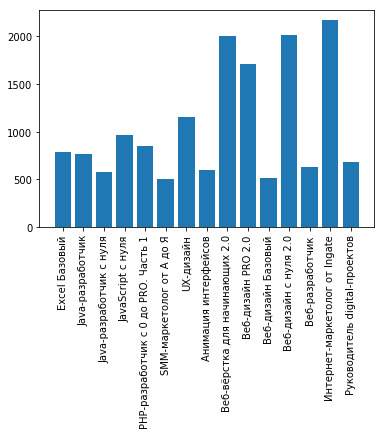

In [10]:
bar = main.groupby('course_title')['student_id'].nunique()
plt.xticks(rotation='vertical')
plt.bar(bar.index, bar.values)
plt.show()

3. **(m)** Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий количество студентов на каждом курсе. График должен иметь заголовок. Значения должны быть отсортированы. Цвет столбцов должен содержать информацию о сфере, к которой относится курс (то есть нужна легенда). Прозрачность должна стоять на отметке 0.1. На график должна быть нанесена линия медианы. У медианы должен быть свой цвет. Рамки у графика быть не должно ⭐

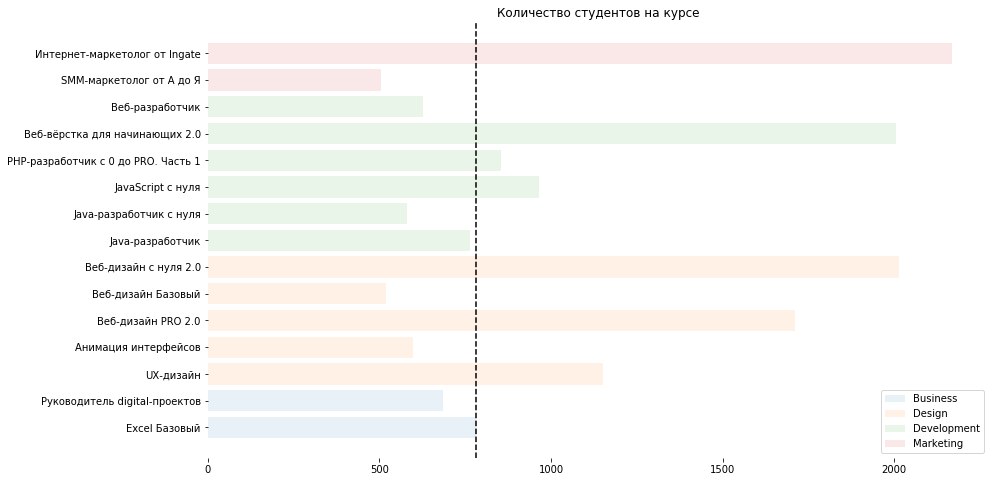

In [11]:
plt.figure(figsize=(14, 8))
for name, group in main.groupby(['course_field']):
    x = group.groupby('course_title')['student_id'].nunique().index
    y = group.groupby('course_title')['student_id'].nunique().values
    plt.barh(x, y, label=name, alpha=0.1)
plt.title('Количество студентов на курсе')
plt.axvline(x=np.median(main.groupby('course_title')['student_id'].nunique().values), ls='--', color='black')
plt.box(on=None)
plt.legend() 
plt.show()

## 2. Расчет потенциальной нагрузки на преподавателей

In [12]:
pd.options.display.max_rows = 1000

1. **(p)** Рассчитать прирост студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно). Считать дату начала прохождения курса студентом по дате начала первой домашней работы.

In [13]:
test = main[['course_title', 'student_id', 'start_date']][main['is_homework'] == True].\
groupby(['course_title', 'student_id']).agg('min')

test['start_date'] = pd.to_datetime(test['start_date'])
test['start_date'] = test['start_date'].dt.to_period('M')

df = pd.DataFrame(columns=['start_date'], data=pd.date_range(start='2016-03', end='2019-08',freq='M'))
df['start_date'] = df['start_date'].dt.to_period('M')

test = test.reset_index()

growth = pd.DataFrame()

for name, group in test.groupby('course_title'):
    df['course'] = name
    group = pd.merge(group, df, how='outer', on='start_date')
    group = group.groupby(['course','start_date']).count()
    growth = pd.concat([growth, group])

growth = growth[['student_id']]

c:\program files (x86)\python37-32\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


In [14]:
growth

student_id
course                              start_date            
Excel Базовый                       2016-03              0
                                    2016-04              0
                                    2016-05              0
                                    2016-06              0
                                    2016-07              0
                                    2016-08              0
                                    2016-09              0
                                    2016-10              0
                                    2016-11              0
                                    2016-12              0
                                    2017-01              0
                                    2017-02              0
                                    2017-03              0
                                    2017-04              0
                                    2017-05              0
                                    2017-06              0
                                    2017-07              0
                                    2017-08              0
                                    2017-09              0
                                    2017-10              0
                                    2017-11              0
                                    2017-12              0
                                    2018-01              0
                                    2018-02              6
                                    2018-03              3
                                    2018-04              0
                                    2018-05              3
                                    2018-06              9
                                    2018-07             13
                                    2018-08             15
                                    2018-09             40
                                    2018-10             30
                                    2018-11             33
                                    2018-12             43
                                    2019-01             52
                                    2019-02             46
                                    2019-03             63
                                    2019-04             46
                                    2019-05             45
                                    2019-06             43
                                    2019-07             28
Java-разработчик                    2016-03              0
                                    2016-04              0
                                    2016-05              0
                                    2016-06              0
                                    2016-07              0
                                    2016-08              0
                                    2016-09              0
                                    2016-10              0
                                    2016-11              0
                                    2016-12              0
                                    2017-01              0
                                    2017-02              0
                                    2017-03              0
                                    2017-04              0
                                    2017-05              0
                                    2017-06              0
                                    2017-07              0
                                    2017-08              0
                                    2017-09              0
                                    2017-10              0
                                    2017-11              0
                                    2017-12              0
                                    2018-01              1
                                    2018-02             14
                                    2018-03             26
                                    

2. **(m)** На основании первого пункта построить line-graph с приростом студентов в каждом месяце для каждого курса. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы.

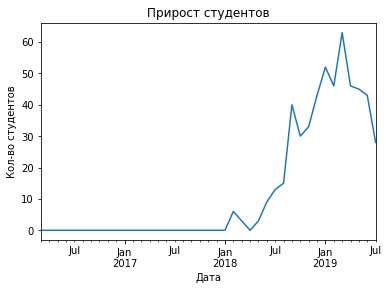

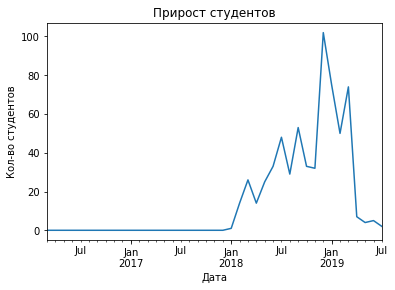

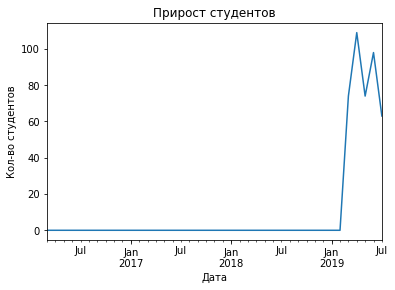

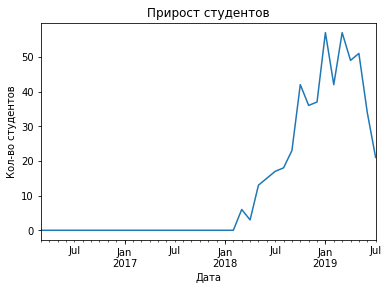

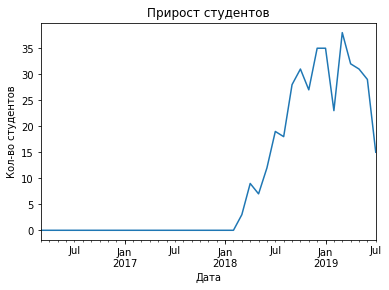

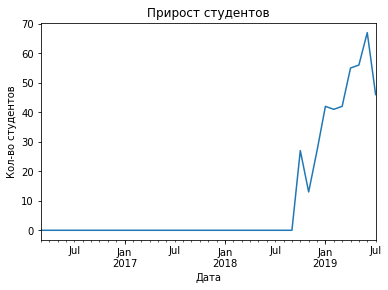

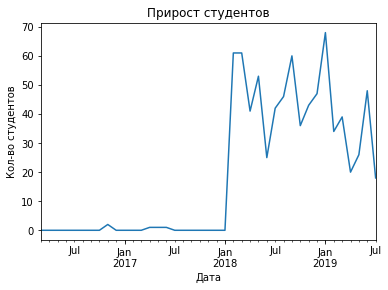

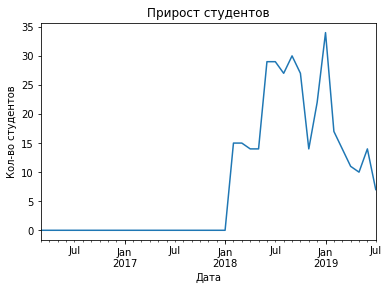

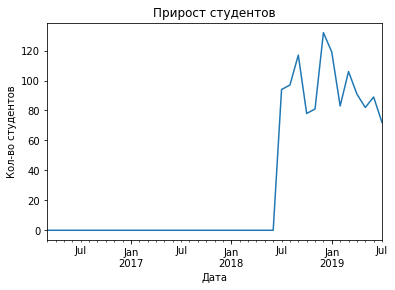

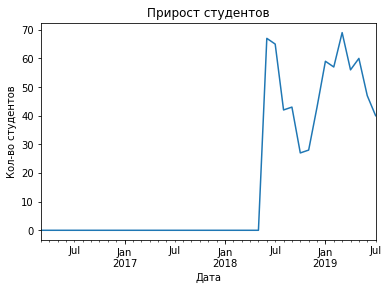

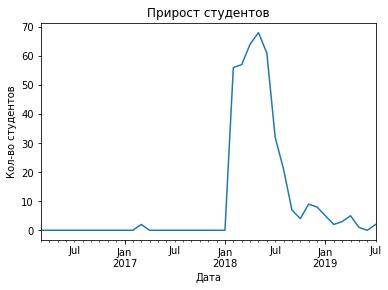

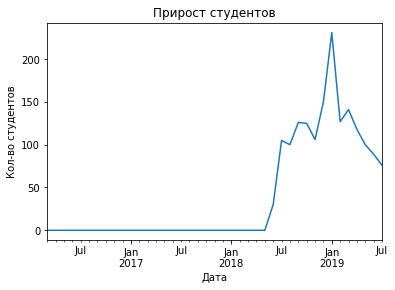

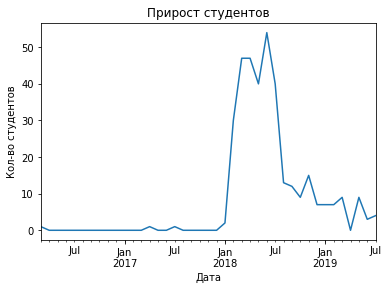

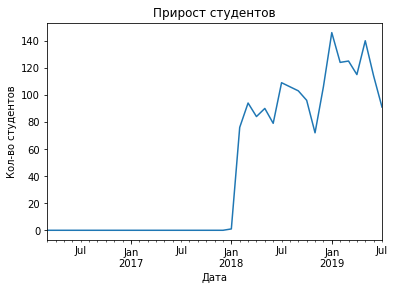

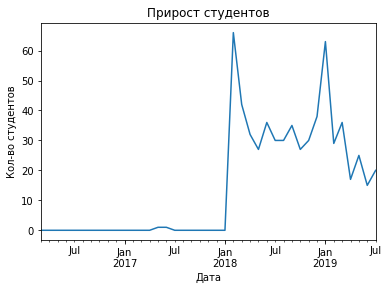

In [15]:
for name, group in growth.groupby('course'):
    group.reset_index()[['start_date', 'student_id']].set_index('start_date').plot.line(legend=None)
    plt.title('Прирост студентов')
    plt.xlabel('Дата')
    plt.ylabel('Кол-во студентов')

3. **(m)** На основании первого пункта построить line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая прирост, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно

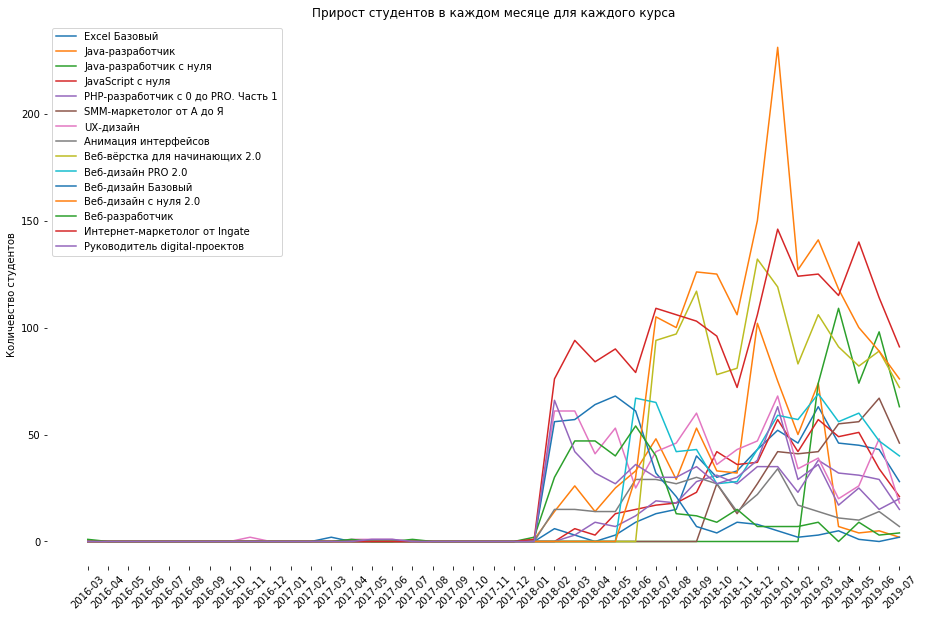

In [16]:
plt.figure(figsize=(16, 10))

for name, group in growth.groupby('course'):
    group = group.reset_index()
    group = group[['start_date', 'student_id']]
    x = np.arange(0, len(group), 1)
    plt.plot(x, group['student_id'], label=name)
    plt.xticks(x, group['start_date'], rotation=45)
plt.legend()
plt.ylabel('Количевство студентов')
plt.title('Прирост студентов в каждом месяце для каждого курса')
plt.box(on=None)
plt.show()

4. **(p)** Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)

In [17]:
progress = main[['start_date', 'finish_date', 'course_title']][(main['is_homework'] == True) & (main['status'] == 'done')]
progress['start_date'] = pd.to_datetime(progress['start_date']).dt.to_period('M')
progress['finish_date'] = pd.to_datetime(progress['finish_date']).dt.to_period('M')
res = pd.DataFrame()

for name, group in progress.groupby('course_title'):
    sample = pd.DataFrame(columns=['date'], data=pd.date_range(start='2016-03', end='2019-08',freq='M'))
    sample['date'] = sample['date'].dt.to_period('M')
    sample['prog'] = [0 for i in range(len(sample))]
    sample['course'] = name
    for i in range(len(group)):
        for j in range(len(sample)):
            if sample.iloc[j, 0] >= group.iloc[i, 0] and sample.iloc[j, 0] <= group.iloc[i, 1]:
                sample.iloc[j, 1] += 1
    res = pd.concat([res, sample])

In [71]:
res

,date,prog,course
0,2016-03,0,Excel Базовый
1,2016-04,0,Excel Базовый
2,2016-05,0,Excel Базовый
3,2016-06,0,Excel Базовый
4,2016-07,0,Excel Базовый
5,2016-08,0,Excel Базовый
6,2016-09,0,Excel Базовый
7,2016-10,0,Excel Базовый
8,2016-11,0,Excel Базовый
9,2016-12,0,Excel Базовый


5. **(m)** Построить line-graph по четвертому пункту. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы

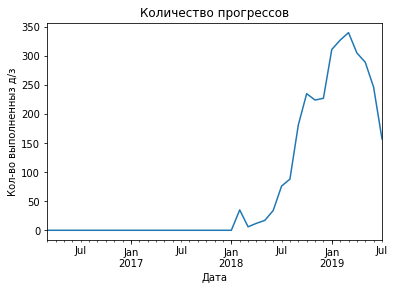

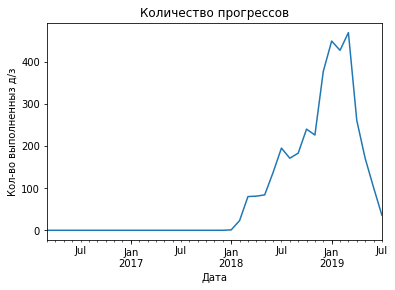

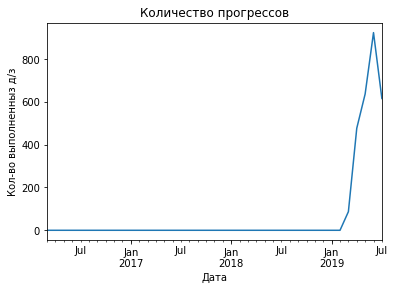

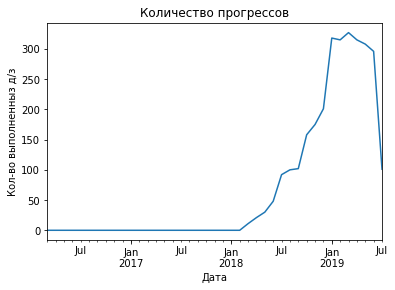

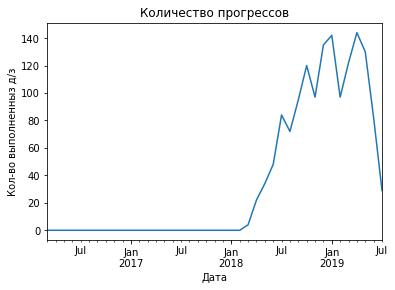

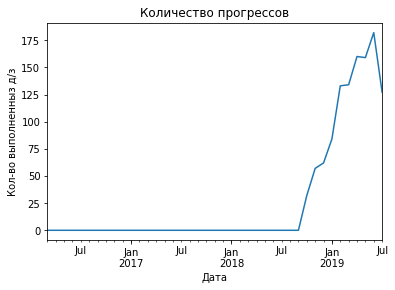

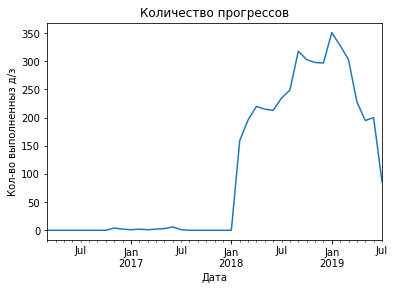

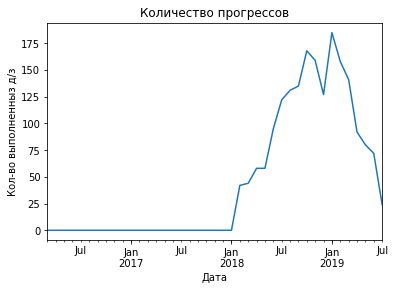

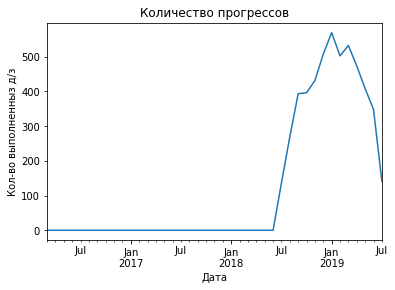

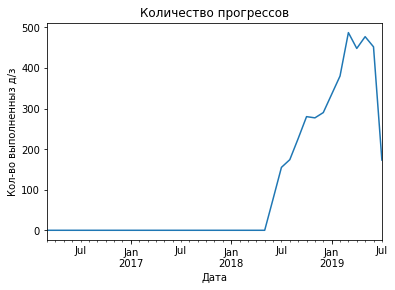

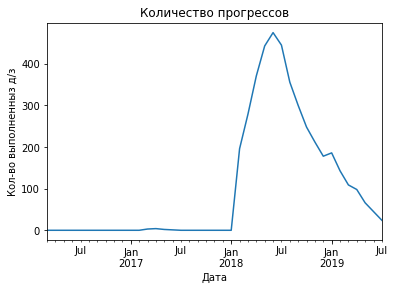

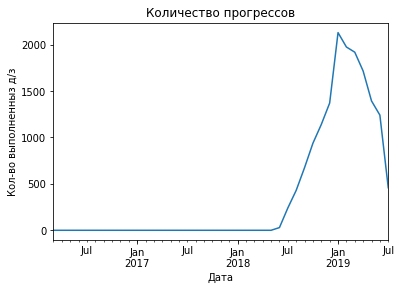

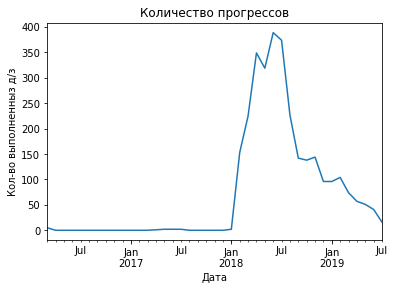

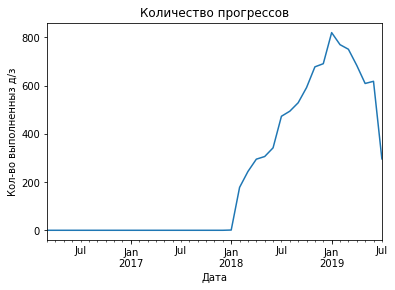

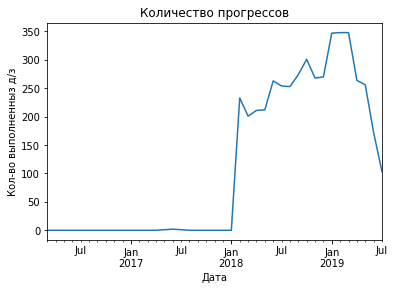

In [19]:
for name, group in res.groupby('course'):
    group.reset_index()[['date', 'prog']].set_index('date').plot.line(legend=None)
    plt.title('Количество прогрессов')
    plt.xlabel('Дата')
    plt.ylabel('Кол-во выполненныз д/з')

6. **(m)** Построить один line-graph для всех курсов по четвертому пункту. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая количество прогрессов, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно

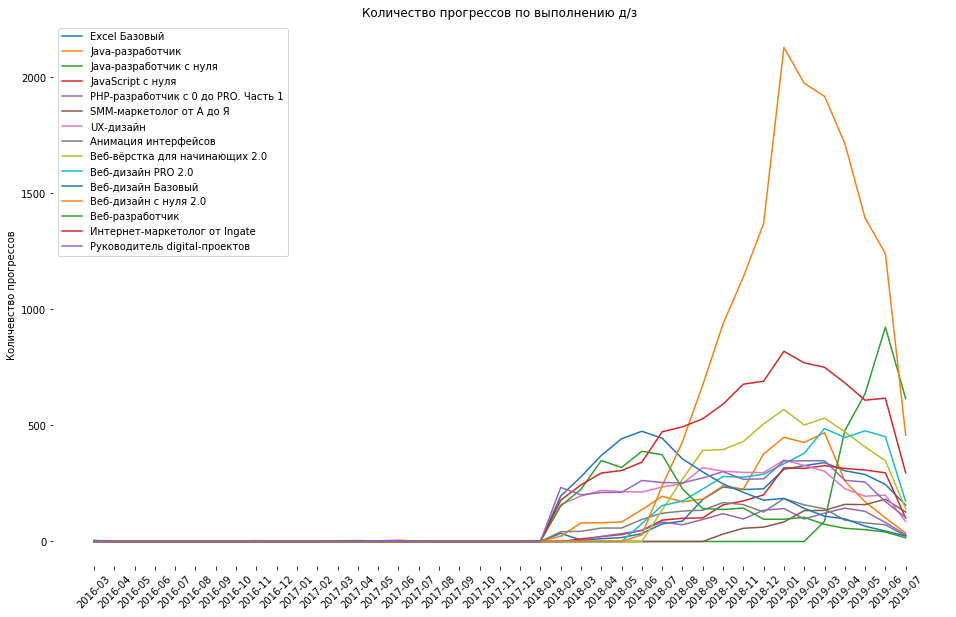

In [20]:
plt.figure(figsize=(16, 10))

for name, group in res.groupby('course'):
    group = group.reset_index()
    group = group[['date', 'prog']]
    x = np.arange(0, len(group), 1)
    plt.plot(x, group['prog'], label=name)
    plt.xticks(x, group['date'], rotation=45)
plt.legend()
plt.ylabel('Количевство прогрессов')
plt.title('Количество прогрессов по выполнению д/з')
plt.box(on=None)
plt.show()

## 3. Выявление проблемных модулей

1. **(p)** Рассчитать минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса. Если домашних заданий в модуле несколько, то считать разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле

In [21]:
problems = main[['start_date', 'finish_date', 'course_title', 'module_title']][(main['is_homework'] == True) & (main['status'] == 'done')]

problems['start_date'] = pd.to_datetime(problems['start_date']).dt.date
problems['finish_date'] = pd.to_datetime(problems['finish_date']).dt.date
problems['tt'] = problems['finish_date'] - problems['start_date']

lock = problems.groupby(['course_title', 'module_title'])['tt'].describe()[['min', 'max', 'mean', '50%']]
lock

min  \
course_title                        module_title                                                           
Excel Базовый                        Визуализация данных Excel                           0 days 00:00:00   
                                    Основной функционал Excel                            0 days 00:00:00   
                                    Основной функционал Excel (продолжение)              0 days 00:00:00   
                                    Сводные таблицы Excel                                0 days 00:00:00   
                                    Формулы и функции Excel. Более сложные формулы       0 days 00:00:00   
                                    Формулы и функции Excel. Введение                    0 days 00:00:00   
                                    Формулы и функции Excel. Продолжаем работать с ...   0 days 00:00:00   
                                    Формулы и функции Excel. Работа с ошибками, про...   0 days 00:00:00   
                                    Экзаменационная работа                               1 days 00:00:00   
Java-разработчик                    Вводный модуль                                       0 days 00:00:00   
                                    Веб-приложения: формы, заголовки и сессии            0 days 00:00:00   
                                    Внешний вид GUI и рисование                          0 days 00:00:00   
                                    Итоговая тема                                        0 days 00:00:00   
                                    Массивы и коллекции                                  0 days 00:00:00   
                                    Многопоточность                                      0 days 00:00:00   
                                    Наследование и полиморфизм                           0 days 00:00:00   
                                    Объекты и классы                                     0 days 00:00:00   
                                    Оптимизация кода и приложений                        0 days 00:00:00   
                                    Основы построения GUI                                0 days 00:00:00   
                                    Основы построения веб-приложений                     0 days 00:00:00   
                                    Работа с базами данных                               0 days 00:00:00   
                                    Работа с файлами и сетью                             0 days 00:00:00   
                                    Синтаксис языка                                      0 days 00:00:00   
                                    Тестирование и отладка                               0 days 00:00:00   
                                    Числа, строки и даты                                 0 days 00:00:00   
Java-разработчик c нуля             Вводный модуль                                       0 days 00:00:00   
                                    Исключения, отладка, тестирование и логгирование     1 days 00:00:00   
                                    Массивы и коллекции                                  0 days 00:00:00   
                                    Наследование и полиморфизм                           0 days 00:00:00   
                                    Объекты и классы                                     0 days 00:00:00   
                                    Особенности ООП в Java                               0 days 00:00:00   
                                    Работа с файлами и сетью                             0 days 00:00:00   
                                    Синтаксис языка                                      0 days 00:00:00   
                                    Числа, строки и даты                                 0 days 00:00:00   
JavaScript с нуля                   JavaScript в браузере; DOM                           0 days 00:00:00   
                                    React                                                0 days 00:00:00 

2. **(m)** На основании первого пункта построить line-graph с медианным временем прохождения каждого модуля для каждого курса. 15 графиков. Графики должны иметь заголовки

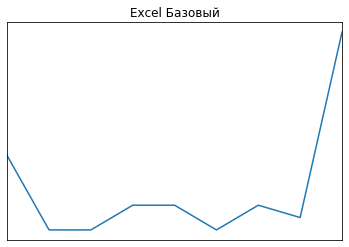

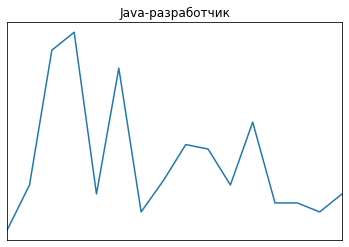

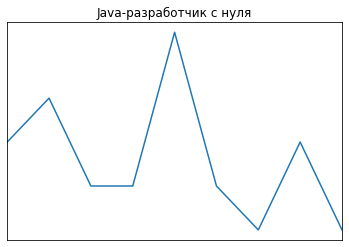

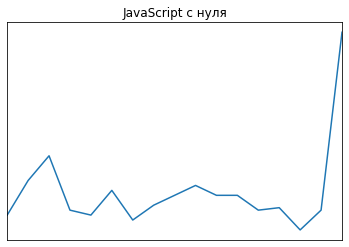

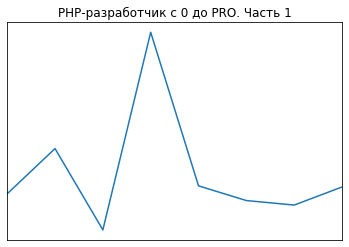

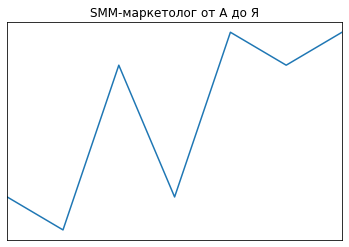

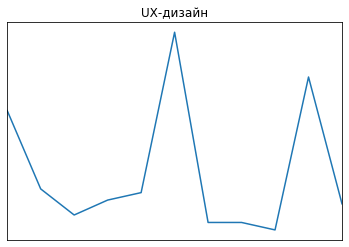

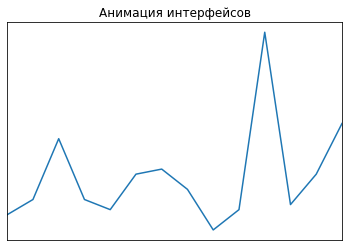

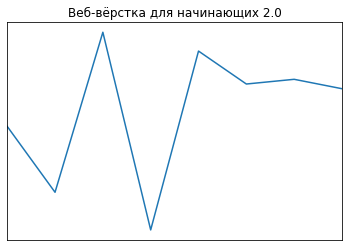

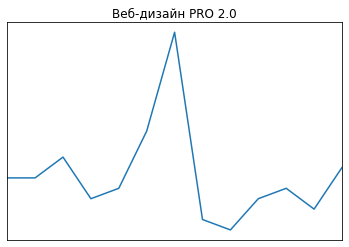

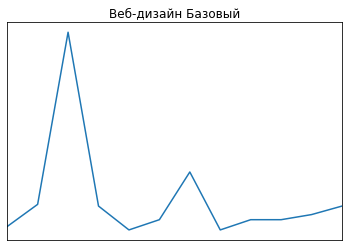

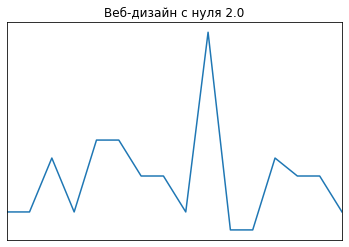

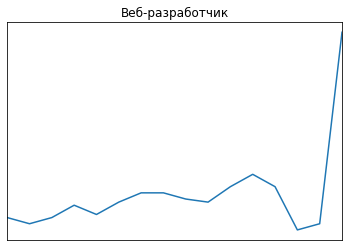

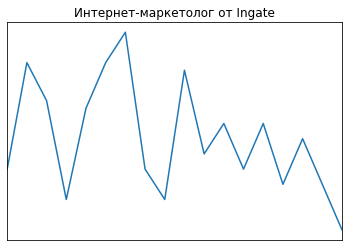

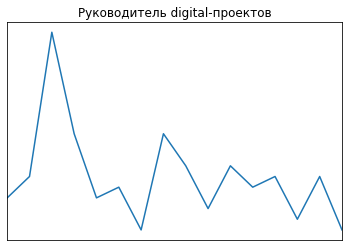

In [22]:
for name, group in lock.groupby('course_title'):
    group.reset_index()[['module_title', '50%']].set_index('module_title').plot.line(legend=None)
    plt.title(name)
    ax = plt.gca()
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)

3. **(p)**  Чтобы выявить сезонность, посчитать медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса.

In [23]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

problems['mon'] = pd.to_datetime(problems['finish_date']).dt.strftime('%b')
problems['mon'] = pd.Categorical(problems['mon'], categories=months, ordered=True)

seasons = problems.groupby(['course_title', 'mon'])['tt'].describe()[['50%']]
seasons

50%
course_title                        mon                  
Excel Базовый                       Jan   2 days 00:00:00
                                    Feb   2 days 00:00:00
                                    Mar   3 days 00:00:00
                                    Apr   2 days 00:00:00
                                    May   3 days 00:00:00
                                    Jun   2 days 00:00:00
                                    Jul   2 days 00:00:00
                                    Aug   3 days 00:00:00
                                    Sep   2 days 00:00:00
                                    Oct   2 days 00:00:00
                                    Nov   2 days 00:00:00
                                    Dec   4 days 00:00:00
Java-разработчик                    Jan   5 days 00:00:00
                                    Feb   5 days 00:00:00
                                    Mar   6 days 00:00:00
                                    Apr   9 days 00:00:00
                                    May  13 days 00:00:00
                                    Jun  12 days 00:00:00
                                    Jul   7 days 00:00:00
                                    Aug  11 days 00:00:00
                                    Sep  11 days 00:00:00
                                    Oct   9 days 00:00:00
                                    Nov   9 days 00:00:00
                                    Dec   4 days 00:00:00
Java-разработчик c нуля             Mar   4 days 00:00:00
                                    Apr   3 days 00:00:00
                                    May   3 days 00:00:00
                                    Jun   3 days 00:00:00
                                    Jul   2 days 00:00:00
JavaScript с нуля                   Jan   5 days 12:00:00
                                    Feb   7 days 00:00:00
                                    Mar   6 days 00:00:00
                                    Apr   5 days 00:00:00
                                    May   6 days 00:00:00
                                    Jun   6 days 00:00:00
                                    Jul   7 days 12:00:00
                                    Aug   8 days 00:00:00
                                    Sep  10 days 00:00:00
                                    Oct  11 days 00:00:00
                                    Nov   9 days 00:00:00
                                    Dec   7 days 00:00:00
PHP-разработчик с 0 до PRO. Часть 1 Jan   9 days 00:00:00
                                    Feb  17 days 00:00:00
                                    Mar   8 days 00:00:00
                                    Apr  11 days 00:00:00
                                    May   9 days 00:00:00
                                    Jun  14 days 12:00:00
                                    Jul   7 days 00:00:00
                                    Aug  11 days 00:00:00
                                    Sep   6 days 00:00:00
                                    Oct  11 days 00:00:00
                                    Nov  16 days 00:00:00
                                    Dec   9 days 00:00:00
SMM-маркетолог от А до Я            Jan  16 days 12:00:00
                                    Feb  10 days 00:00:00
                                    Mar  12 days 00:00:00
                                    Apr   9 days 00:00:00
                                    May   9 days 00:00:00
                                    Jun   8 days 00:00:00
                                    Jul   7 days 00:00:00
                                    Oct   8 days 00:00:00
                                    Nov  16 days 00:00:00
                                    Dec  14 days 00:00:00
UX-дизайн                           Jan  10 days 00:00:00
                                    Feb   3 days 00:00:00
                                    Mar  10 days 00:00:00
                                    Apr  10 days 00:00:00
                                    May   9 days 00:

4. **(m)** На основании третьего пункта построить line-graph, на который будут нанесены линии для каждого курса с медианным временем выполнения домашней работы по месяцам. 15 линий на графике. График должен иметь заголовок. Ось, отражающая время прохождения, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно

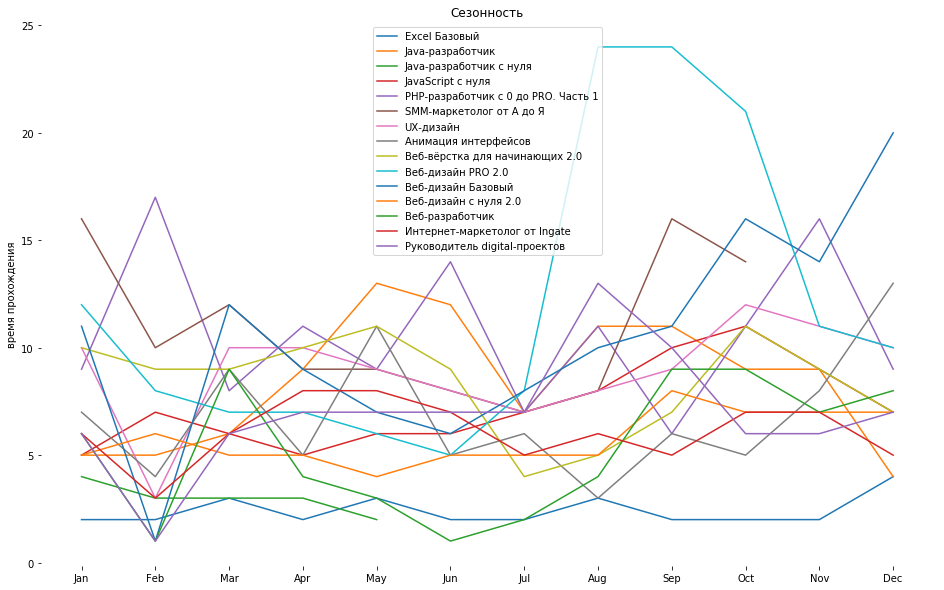

In [24]:
seasons['50%'] = seasons['50%'].astype('timedelta64[D]') / np.timedelta64(1, 'D')

plt.figure(figsize=(16, 10))

for name, group in seasons.groupby('course_title'):
    group = group.reset_index()[['mon', '50%']]
    x = np.arange(0, len(group), 1)
    plt.plot(x, group['50%'], label=name)
    plt.xticks(x, group['mon'])
plt.legend()
plt.ylabel('время прохождения')
plt.title('Сезонность')
plt.box(on=None)
plt.show()

## 4. Расчет конверсии

1. **(p)** Посчитать конверсию перехода студентов из одного модуля в другой на каждом курсе. Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле)

In [91]:
pd.options.mode.chained_assignment = None

start = main[main['is_homework'] == True].groupby(['course_title', 'module_title', 'module_number', 'course_field'])['start_date', 'finish_date']\
.nunique().sort_values(['course_title', 'module_number'])

conversion = pd.DataFrame()

for name, group in start.groupby('course_title'):
    group['conv'] = group.start_date / group.finish_date.shift(1)
    conversion = pd.concat([conversion, group])
conversion['conv'] = conversion['conv'].fillna(0)
conversion = conversion[['conv']]
conversion

conv
course_title                        module_title                                       module_number course_field          
Excel Базовый                       Основной функционал Excel                          1             Business      0.000000
                                    Основной функционал Excel (продолжение)            2             Business      0.947598
                                    Формулы и функции Excel. Введение                  3             Business      0.980296
                                    Формулы и функции Excel. Продолжаем работать с ... 4             Business      0.891473
                                    Формулы и функции Excel. Более сложные формулы     5             Business      0.983498
                                    Формулы и функции Excel. Работа с ошибками, про... 6             Business      0.974074
                                     Визуализация данных Excel                         7             Business      0.983471
                                    Сводные таблицы Excel                              8             Business      1.010000
                                    Экзаменационная работа                             9             Business      1.026882
Java-разработчик                    Вводный модуль                                     1             Development   0.000000
                                    Синтаксис языка                                    2             Development   0.925400
                                    Объекты и классы                                   3             Development   0.875878
                                    Числа, строки и даты                               4             Development   0.962585
                                    Массивы и коллекции                                5             Development   0.931034
                                    Наследование и полиморфизм                         6             Development   1.011561
                                    Тестирование и отладка                             7             Development   0.987500
                                    Основы построения GUI                              8             Development   0.957746
                                    Внешний вид GUI и рисование                        9             Development   1.056604
                                    Работа с файлами и сетью                           10            Development   1.013514
                                    Работа с базами данных                             11            Development   1.045455
                                    Многопоточность                                    12            Development   1.019608
                                    Оптимизация кода и приложений                      13            Development   1.064516
                                    Основы построения веб-приложений                   14            Development   0.961538
                                    Веб-приложения: формы, заголовки и сессии          15            Development   1.043478
                                    Итоговая тема                                      17            Development   1.105263
Java-разработчик c нуля             Вводный модуль                                     1             Development   0.000000
                                    Синтаксис языка                                    2             Development   0.985866
                                    Объекты и классы                                   3             Development   0.954751
                                    Числа, строки и даты                               4             Development   5.493333
                                    Массивы и коллекции                                5             Development   0.617685
                                    Наследование и полиморфизм                         6             Development   0.615207
                           

2. **(m)** Постройте bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. График должен иметь заголовок. Ticks нужно развернуть так, чтобы они были читаемы

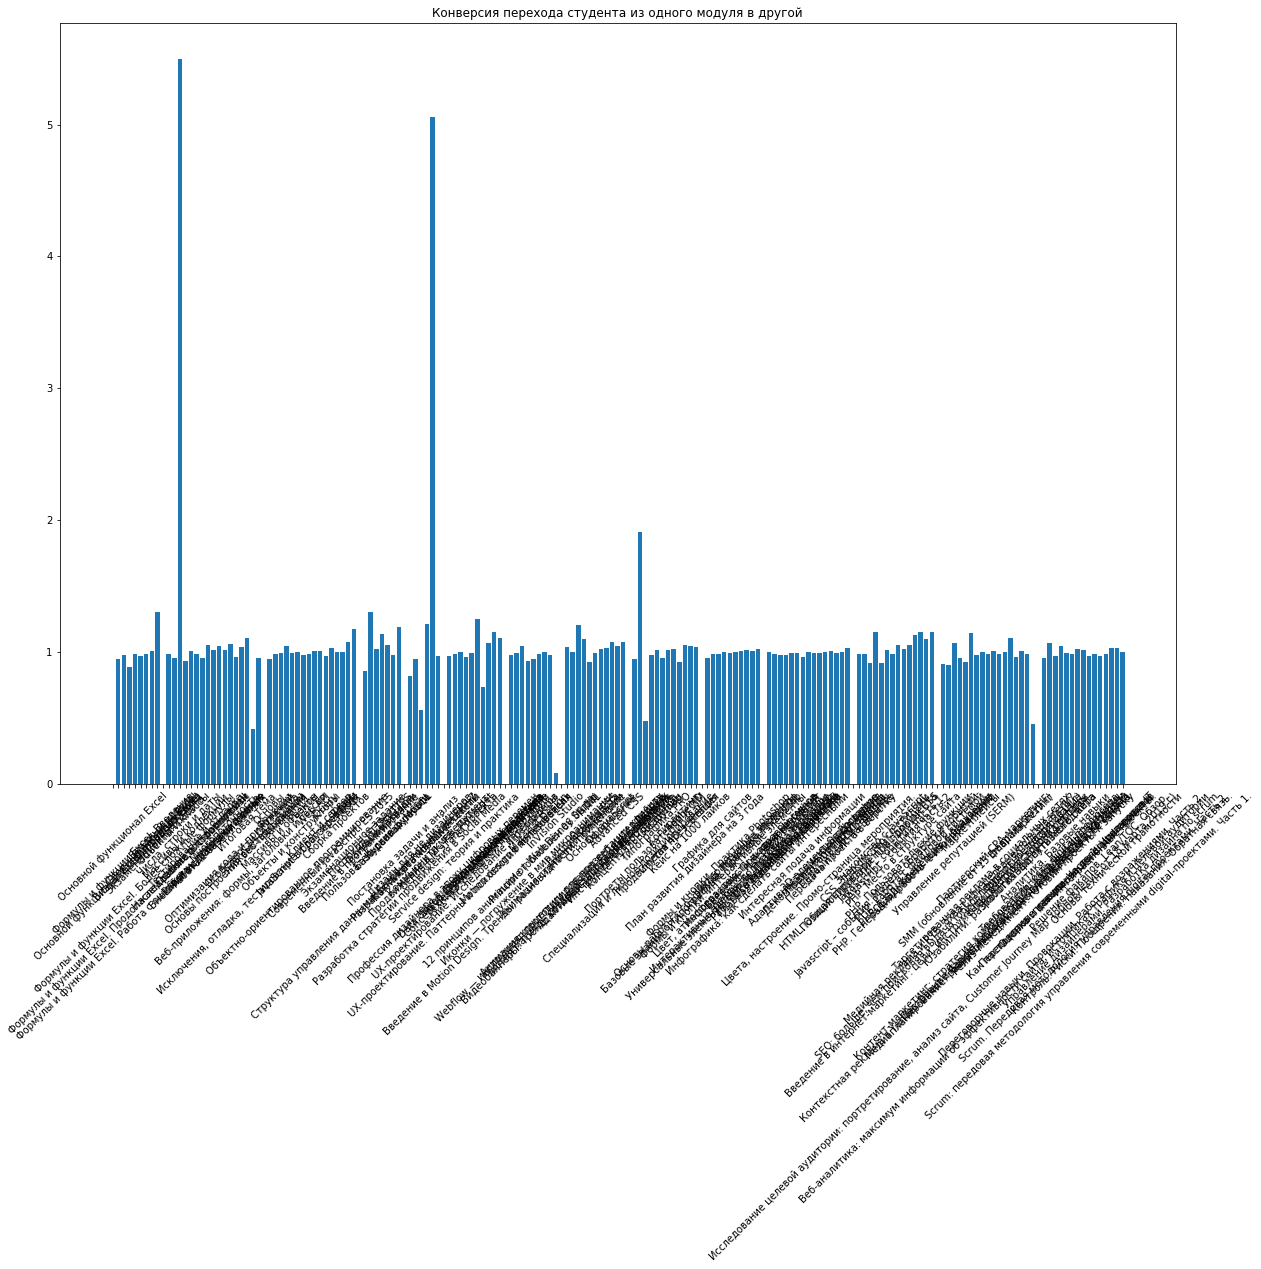

In [94]:
conversion = conversion.reset_index()

plt.figure(figsize=(20, 14))
plt.xticks(rotation='45')
plt.bar(conversion['module_title'], conversion['conv'])
plt.title('Конверсия перехода студента из одного модуля в другой')
plt.show()

3. **(m)** Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 15 графиков. Графики должны иметь заголовки. Ticks должны содержать номер и название модуля. Прозрачность должна стоять на отметке 0.1. На графики должна быть нанесена линия медианы конверсии для каждого курса. У медианы должен быть свой цвет. Рамок у графиков быть не должно ⭐

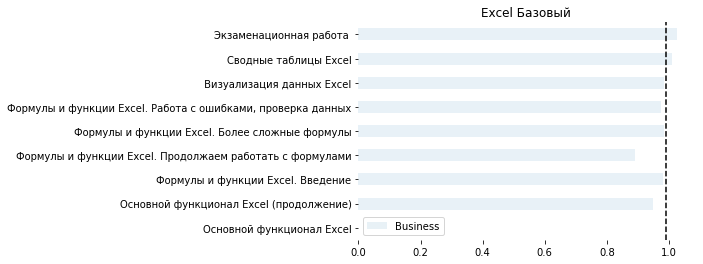

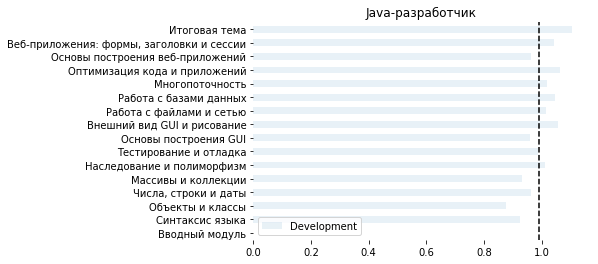

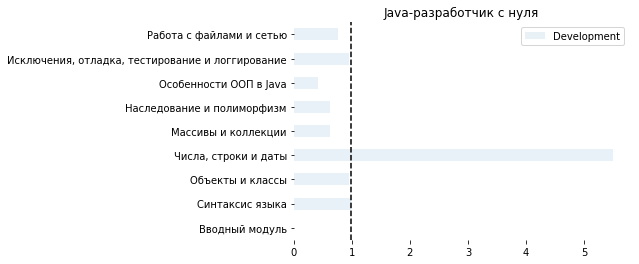

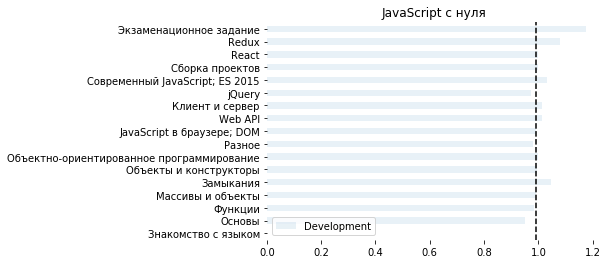

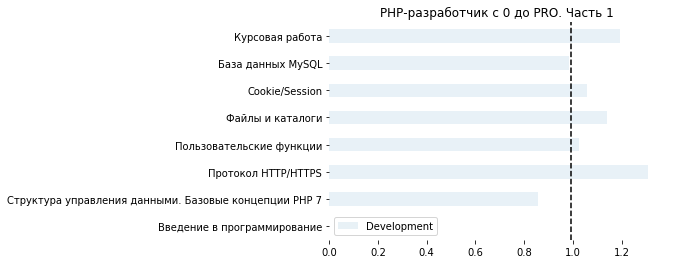

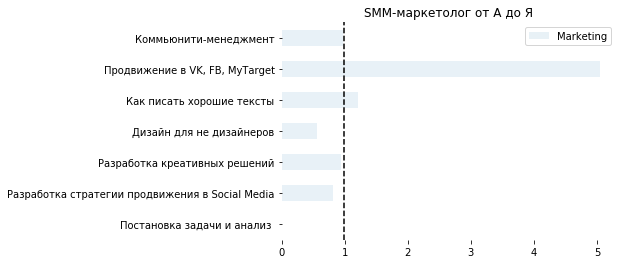

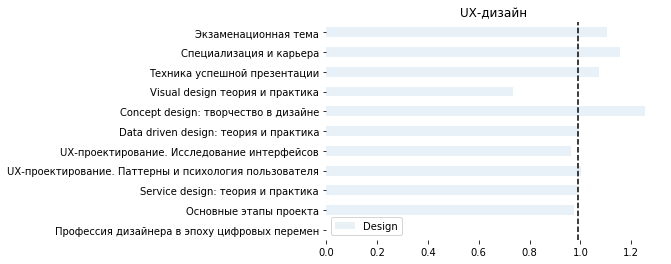

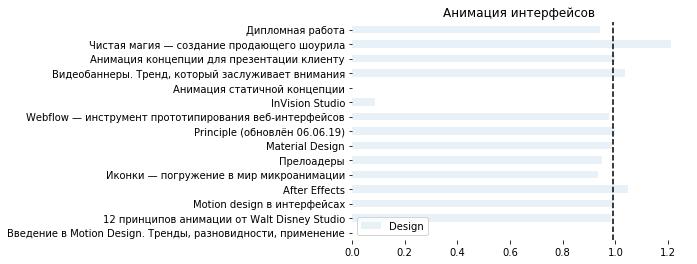

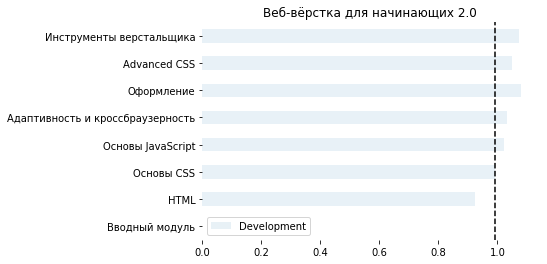

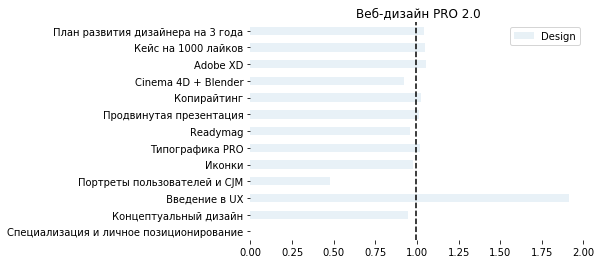

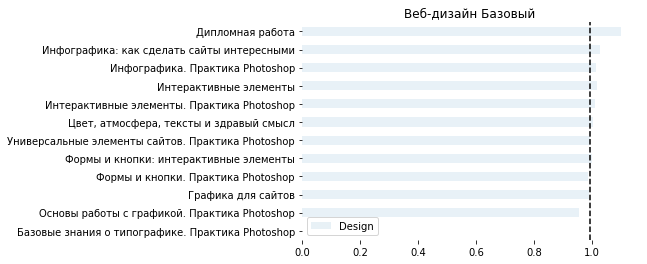

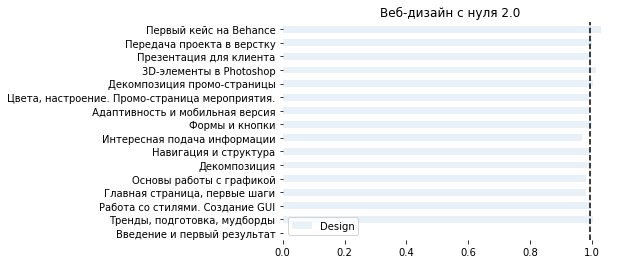

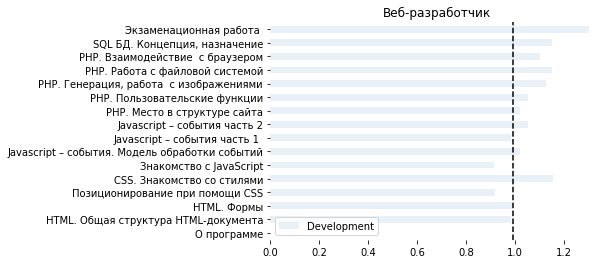

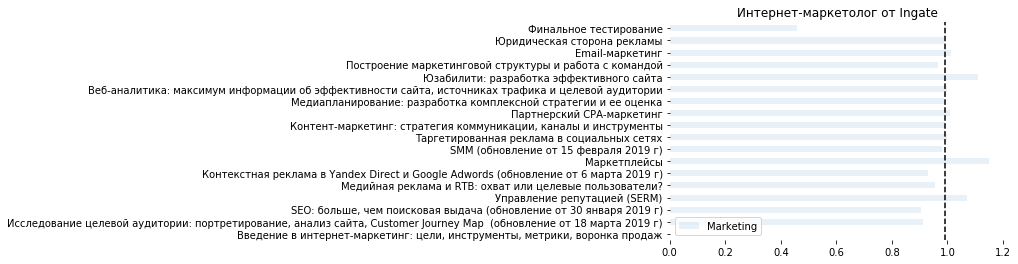

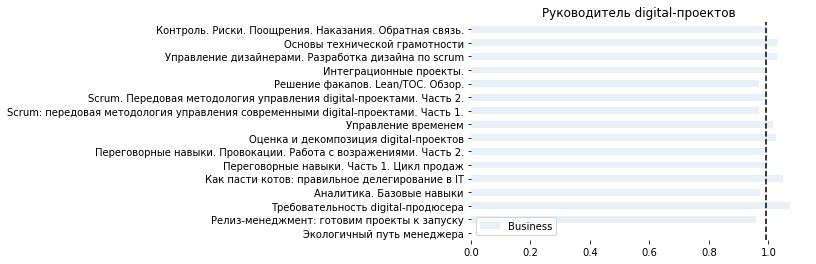

In [101]:
colors = {'Business': 'red', 'Design': 'green', 'Development': 'blue', 'Marketing': 'yellow'}
for name, group in conversion.groupby(['course_title', 'course_field']):
    group.plot.barh(x='module_title', y='conv', label=name[1], alpha=0.1)
    plt.axvline(x=np.median(conversion['conv']), ls='--', color='black')
    plt.title(name[0])
    plt.ylabel(None)
    plt.box(on=None)